In [29]:
import os
current_dir = os.getcwd()
current_dir

'/Users/Gala/repo/UK-Road-Accident-Analysis'

In [30]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [31]:
current_dir = os.getcwd()
current_dir

'/Users/Gala/repo'

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

In [33]:
df = pd.read_csv(os.path.join(current_dir, 'filtered_accident_data_set.csv'))
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Gala/repo/filtered_accident_data_set.csv'

In [27]:
df['Accident Date'].head()

0   2019-01-02
1   2019-01-02
2   2019-01-03
3   2019-01-02
4   2019-01-05
Name: Accident Date, dtype: datetime64[ns]

## Hypothesis 1: Road conditions affect the number of casualties

In [28]:
import pandas as pd
import scipy.stats as stats

# Check hypothesis 1
# Convert date to datetime format
# df['Accident Date'] = pd.to_datetime(df['Accident Date'], format='%d-%m-%Y')

# Group the data
wet = df[df['Road_Surface_Conditions'] == 'Wet or damp']['Number_of_Casualties']
dry = df[df['Road_Surface_Conditions'] == 'Dry']['Number_of_Casualties']

# Mann-Whitney U test (if data is not normally distributed) or t-test (if normally distributed)
stat, p = stats.mannwhitneyu(wet, dry, alternative='two-sided')
print(f"Road Surface Conditions Test: U={stat}, p-value={p}")


Road Surface Conditions Test: U=100107906.0, p-value=9.950334596189788e-14


This means road surface conditions significantly affect the number of casualties. Wet/damp conditions likely result in more casualties than dry conditions.

/var/folders/bk/c0wwfkw55jz9lxqqqp8p8wr40000gn/T/ipykernel_16738/2857191832.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Road_Surface_Conditions", y="Number_of_Casualties", palette="coolwarm")


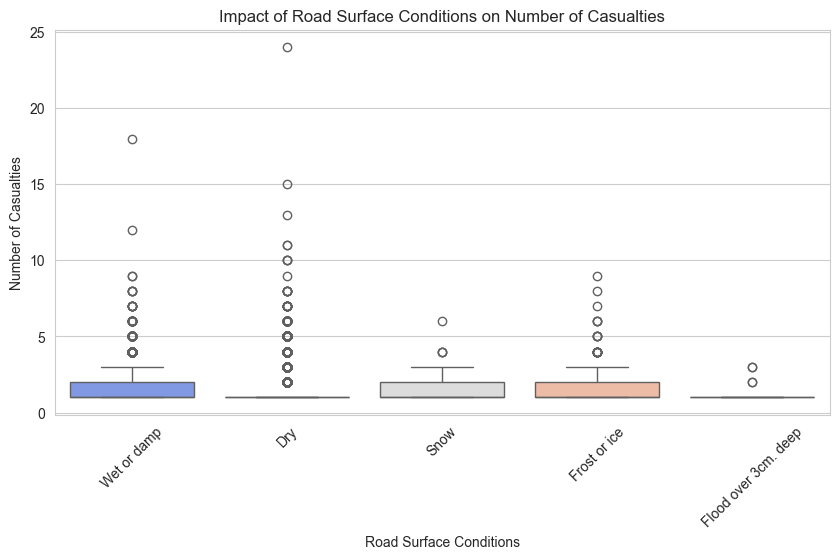

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Road_Surface_Conditions", y="Number_of_Casualties", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Impact of Road Surface Conditions on Number of Casualties")
plt.xlabel("Road Surface Conditions")
plt.ylabel("Number of Casualties")
plt.show()


## Hypothesis 2: Rural accidents are more severe than urban accidents

In [18]:
# Check hypothesis 2

urban = df[df['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties']
rural = df[df['Urban_or_Rural_Area'] == 'Rural']['Number_of_Casualties']

# Mann-Whitney U test
stat, p = stats.mannwhitneyu(urban, rural, alternative='greater')
print(f"Urban vs Rural Test: U={stat}, p-value={p}")



Urban vs Rural Test: U=26131292.0, p-value=0.9999999999998367


<Axes: xlabel='Urban_or_Rural_Area', ylabel='Number_of_Casualties'>

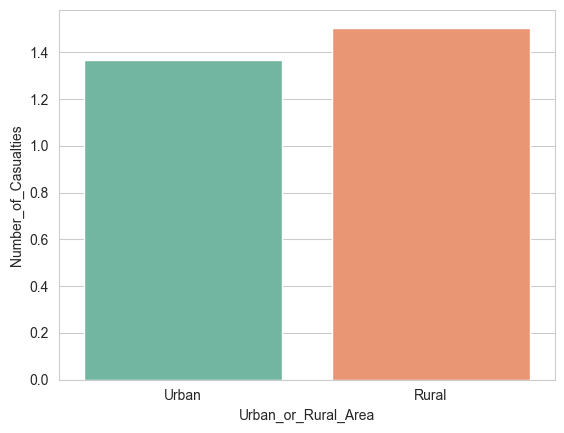

In [22]:
sns.barplot(data=df, 
            x="Urban_or_Rural_Area", 
            y="Number_of_Casualties", 
            hue="Urban_or_Rural_Area",  
            palette="Set2", 
            errorbar=None, 
            legend=False)  


In [34]:
# Calculate the average number of casualties for Urban and Rural areas
urban_avg = df[df['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties'].mean()
rural_avg = df[df['Urban_or_Rural_Area'] == 'Rural']['Number_of_Casualties'].mean()

# Print the string with the information
print(f"Average number of casualties in Urban areas: {urban_avg:.2f}")
print(f"Average number of casualties in Rural areas: {rural_avg:.2f}")


Average number of casualties in Urban areas: 1.37
Average number of casualties in Rural areas: 1.51


There is no significant difference in the number of casualties between urban and rural areas, even though there are far more accidents in urban areas.

## Hypothesis 3: More accidents occur on weekends than weekdays

In [ ]:
# Check hypothesis 3

df['Day_of_Week'] = df['Accident Date'].dt.dayofweek  # 0 - Monday, 6 - Sunday
weekend = df[df['Day_of_Week'] >= 5]['Number_of_Casualties']
weekday = df[df['Day_of_Week'] < 5]['Number_of_Casualties']

# Mann-Whitney U test
stat, p = stats.mannwhitneyu(weekday, weekend, alternative='two-sided')
print(f"Weekend vs Weekday Test: U={stat}, p-value={p}")



Weekend vs Weekday Test: U=101325107.0, p-value=2.7086396009109315e-07


In [37]:
# Calculate the average number of casualties for Weekdays and Weekend 

weekdays_avg = weekday.mean()
weekends_avg = weekend.mean()

# Print the string with the information
print(f"Average number of casualties in weekdays: {weekdays_avg:.2f}")
print(f"Average number of casualties in weekends: {weekends_avg:.2f}")


Average number of casualties in weekdays: 1.36
Average number of casualties in weekends: 1.42


/var/folders/bk/c0wwfkw55jz9lxqqqp8p8wr40000gn/T/ipykernel_16738/3323998378.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=casualties_by_day_type, x="Weekend", y="Number_of_Casualties", palette="muted")


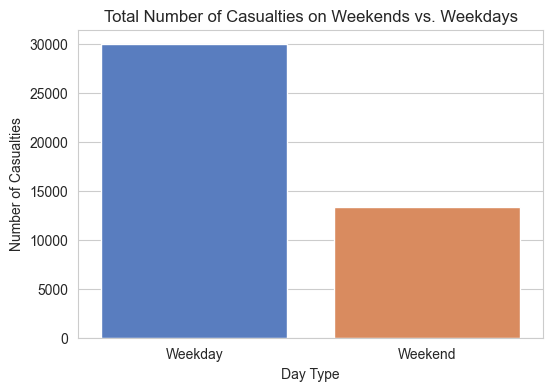

In [38]:
df['Day_of_Week'] = df['Accident Date'].dt.dayofweek  # 0=Monday, ..., 6=Sunday
df['Weekend'] = df['Day_of_Week'].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

casualties_by_day_type = df.groupby('Weekend')['Number_of_Casualties'].sum().reset_index()


plt.figure(figsize=(6, 4))
sns.barplot(data=casualties_by_day_type, x="Weekend", y="Number_of_Casualties", palette="muted")


plt.title("Total Number of Casualties on Weekends vs. Weekdays")
plt.xlabel("Day Type")
plt.ylabel("Number of Casualties")
plt.show()


This means accidents are significantly more frequent on weekends than on weekdays.

## Hypothesis 4: Lighting conditions affect accident severity

In [ ]:
# Check hypothesis 4

light_conditions = df.groupby("Light_Conditions")["Accident_Severity"].value_counts(normalize=True).unstack()

# Chi-square test to check for dependency
stat, p, dof, expected = stats.chi2_contingency(light_conditions.fillna(0))
print(f"Light Conditions & Severity Test: χ²={stat}, p-value={p}")


Light Conditions & Severity Test: χ²=0.2075132746603079, p-value=0.9999955550562254


This means lighting conditions do not significantly impact accident severity.

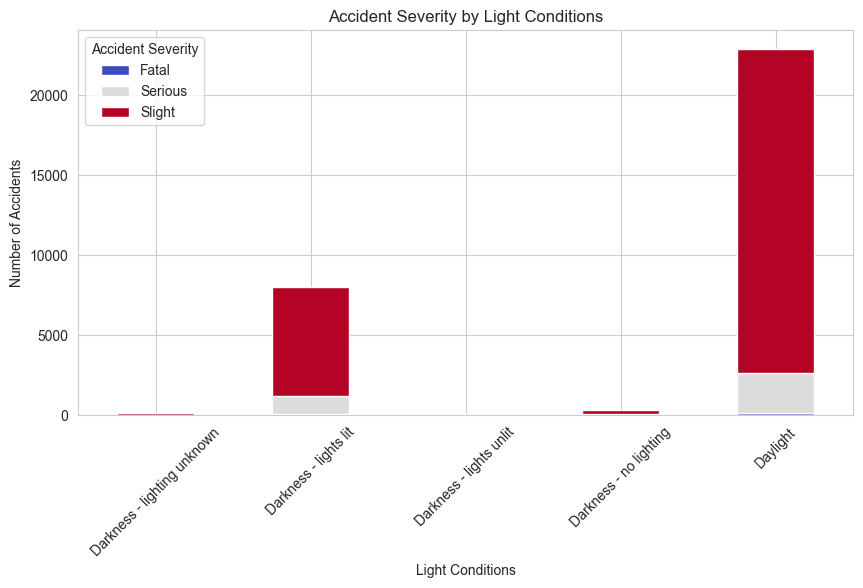

In [24]:
import plotly.express as px

severity_counts = df.groupby("Light_Conditions")["Accident_Severity"].value_counts().unstack().fillna(0)
severity_counts.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm")

plt.title("Accident Severity by Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend(title="Accident Severity")
plt.show()
